In [0]:
from __future__ import print_function, division

import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
import copy

plt.ion() 

In [0]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os
os.chdir('drive/My Drive/Task 3/')


In [0]:
ls

'Animals Dataset'/                inception.pth
 dataset_attr_animals.csv         resnet_animals.pth
 dataset_attr.csv                 testdata_animals.csv
'Habitats Dataset'/               testdata.csv
 inception_animals.pth            traineddata_animals.csv
 inception_freeze_animals_1.pth   traineddata.csv
 inception_freeze_animals.pth    'Val Animals'/
 inception_habitats.pth          'Val Habitats'/


In [0]:
from os.path import exists
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())
cuda_output = !ldconfig -p|grep cudart.so|sed -e 's/.*\.\([0-9]*\)\.\([0-9]*\)$/cu\1\2/'
accelerator = cuda_output[0] if exists('/dev/nvidia0') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.4.1-{platform}-linux_x86_64.whl torchvision
  
!pip install Pillow==4.0.0
!pip install PIL
!pip install image
!pip install torch torchvision


tcmalloc: large alloc 1073750016 bytes == 0x57ff4000 @  0x7f589bdf62a4 0x591a07 0x5b5d56 0x502e9a 0x506859 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x502209 0x502f3d 0x506859 0x504c28 0x502540 0x502f3d 0x507641 0x504c28 0x502540 0x502f3d 0x507641
    100% |████████████████████████████████| 5.6MB 7.2MB/s 
torchvision 0.2.1 has requirement pillow>=4.1.1, but you'll have pillow 4.0.0 which is incompatible.
  Found existing installation: Pillow 5.3.0
    Uninstalling Pillow-5.3.0:
      Successfully uninstalled Pillow-5.3.0
  Could not find a version that satisfies the requirement PIL (from versions: )
No matching distribution found for PIL
  Using cached https://files.pythonhosted.org/packages/62/94/5430ebaa83f91cc7a9f687ff5238e26164a779cca2ef9903232268b0a318/Pillow-5.3.0-cp36-cp36m-manylinux1_x86_64.whl
  Found existing installation: Pillow 4.0.0
    Uninstalling Pillow-4.0.0:
      Successfully

In [0]:
# import required libraries
import os
import re
import torch
import csv
import torch.nn as nn
import torchvision
import matplotlib.pyplot as plt
import torchvision.datasets as datasets
import torchvision.transforms as transforms
import pandas as pd
import numpy as np
from torch.utils.data import Dataset, DataLoader
from sklearn.utils import shuffle
from PIL import Image


def create_meta_csv(dataset_path, destination_path):
    
    """Create a meta csv file given a dataset folder path of images.

    This function creates and saves a meta csv file named 'dataset_attr.csv' given a dataset folder path of images.
    The file will contain images and their labels. This file can be then used to make
    train, test and val splits, randomize them and load few of them (a mini-batch) in memory
    as required. The file is saved in dataset_path folder if destination_path is not provided.

    The purpose behind creating this file is to allow loading of images on demand as required. Only those images required are loaded randomly but on demand using their paths.
    
    Args:
        dataset_path (str): Path to dataset folder
        destination_path (str): Destination to store meta file if None provided, it'll store file in dataset_path

    Returns:
        True (bool): Returns True if 'dataset_attr.csv' was created successfully else returns an exception
    """

    # Change dataset path accordingly
    dataset_path = ""
    DATASET_PATH = os.path.abspath(dataset_path)

    if not os.path.exists(os.path.join(DATASET_PATH, "/dataset_attr.csv")):

        # Make a csv with full file path and labels
        with open('dataset_attr.csv','w',newline="") as fp:
            SEPARATOR = ","
            a = csv.writer(fp,delimiter=SEPARATOR)
            data = [['Habitats_Dataset_Path', 'Label']]
            a.writerows(data)
            for dirname, dirnames, filenames in os.walk('Habitats Dataset'):
                for subdirname in dirnames:
                    subject_path = os.path.join(dirname, subdirname)
                    for filename in os.listdir(subject_path):
                        abs_path = "%s/%s" % (subject_path, filename)
                        if(re.search("baseball", abs_path)):
                            label = "baseball"
                        elif(re.search("basketball court", abs_path)):
                            label = "basketball court"
                        elif(re.search("beach", abs_path)):
                            label = "beach"
                        elif(re.search("circular farm", abs_path)):
                            label = "circular farm"
                        elif(re.search("cloud", abs_path)):
                            label = "cloud"
                        elif(re.search("commercial area", abs_path)):
                            label = "commercial area"
                        elif(re.search("dense residential", abs_path)):
                            label = "dense residential"
                        elif(re.search("desert", abs_path)):
                            label = "desert"
                        elif(re.search("forest", abs_path)):
                            label = "forest"
                        elif(re.search("golf course", abs_path)):
                            label = "golf course"
                        elif(re.search("harbor", abs_path)):
                            label = "harbor"
                        elif(re.search("island", abs_path)):
                            label = "island"
                        elif(re.search("lake", abs_path)):
                            label = "lake"
                        elif(re.search("meadow", abs_path)):
                            label = "meadow"
                        elif(re.search("medium residential area", abs_path)):
                            label = "medium residential area"
                        elif(re.search("mountain", abs_path)):
                            label = "mountain"
                        elif(re.search("rectangular farm", abs_path)):
                            label = "rectangular farm"
                        elif(re.search("river", abs_path)):
                            label = "river"
                        elif(re.search("sea glacier", abs_path)):
                            label = "sea glacier"
                        elif(re.search("shrubs", abs_path)):
                            label = "shrubs"
                        elif(re.search("snowberg", abs_path)):
                            label = "snowberg"
                        elif(re.search("sparse residential area", abs_path)):
                            label = "sparse residential area"
                        elif(re.search("thermal power station", abs_path)):
                            label = "thermal power station"
                        else:
                            label = "wetland"

                        data = [[abs_path, label]]
                        a.writerows(data)

            # change destination_path to DATASET_PATH if destination_path is None 
            if destination_path == None:
                destination_path = dataset_path

            # write out as dataset_attr.csv in destination_path directory

            # if no error
            return True

def create_and_load_meta_csv_df(dataset_path, destination_path, randomize=True, split=None):
    """Create a meta csv file given a dataset folder path of images and loads it as a pandas dataframe.

    This function creates and saves a meta csv file named 'dataset_attr.csv' given a dataset folder path of images.
    The file will contain images and their labels. This file can be then used to make
    train, test and val splits, randomize them and load few of them (a mini-batch) in memory
    as required. The file is saved in dataset_path folder if destination_path is not provided.

    The function will return pandas dataframes for the csv and also train and test splits if you specify a 
    fraction in split parameter.
    
    Args:
        dataset_path (str): Path to dataset folder
        destination_path (str): Destination to store meta csv file
        randomize (bool, optional): Randomize the csv records. Defaults to True
        split (double, optional): Percentage of train records. Defaults to None

    Returns:
        dframe (pandas.Dataframe): Returns a single Dataframe for csv if split is none, else returns more two Dataframes for train and test splits.
        train_set (pandas.Dataframe): Returns a Dataframe of length (split) * len(dframe)
        test_set (pandas.Dataframe): Returns a Dataframe of length (1 - split) * len(dframe)
    """
    if create_meta_csv(dataset_path, destination_path=destination_path):
        dframe = pd.read_csv(os.path.join("", 'dataset_attr.csv'))

    # shuffle if randomize is True or if split specified and randomize is not specified 
    # so default behavior is split
    if randomize == True or (split != None and randomize == None):
        
        dframe = shuffle(dframe)
        pass 

    if split != None:
        train_set, test_set = train_test_split(dframe, split)
        return dframe, train_set, test_set 
    
    return dframe

def train_test_split(dframe, split_ratio):
    """Splits the dataframe into train and test subset dataframes.

    Args:
        split_ration (float): Divides dframe into two splits.

    Returns:
        train_data (pandas.Dataframe): Returns a Dataframe of length (split_ratio) * len(dframe)
        test_data (pandas.Dataframe): Returns a Dataframe of length (1 - split_ratio) * len(dframe)
    """
    # divide into train and test dataframes
    train_data  = dframe.iloc[0:int(len(dframe)*split_ratio),:]
    test_data = dframe.iloc[len(dframe)-(len(dframe)-len(train_data)):,:]
    return train_data, test_data



class ImageDataset(Dataset):
    """Image Dataset that works with images
    
    This class inherits from torch.utils.data.Dataset and will be used inside torch.utils.data.DataLoader
    Args:
        data (str): Dataframe with path and label of images.
        transform (torchvision.transforms.Compose, optional): Transform to be applied on a sample. Defaults to None.
    
    Examples:
        >>> df, train_df, test_df = create_and_load_meta_csv_df(dataset_path, destination_path, randomize=randomize, split=0.99)
        >>> train_dataset = dataset.ImageDataset(train_df)
        >>> test_dataset = dataset.ImageDataset(test_df, transform=...)
    """
    
    def __init__(self, data,transform):
    
        self.data = data
        self.transform = transform
        print(self.transform)
        self.classes = ['baseball','basketball court','beach','circular farm','cloud','commercial area','dense residential','desert','forest','golf course','harbor','island','lake','meadow','medium residential area','mountain','rectangular farm','river','sea glacier','shrubs','snowberg','sparse residential area','thermal power station','wetland']
        

    def __len__(self):
        print(len(self.data))
        return len(self.data)

    def __getitem__(self, idx):

        img_path=self.data.iloc[idx]['Habitats_Dataset_Path']
        image = Image.open(img_path)
        
        label = self.classes.index(self.data.iloc[idx]['Label'])
        
        
        if self.transform:
            image = self.transform(image)

        return (image, label)


if __name__ == "__main__":
    # test config
    dataset_path = '../Habitats Dataset'
    dest = '../Habitats Dataset'
    classes = 24
    total_rows = 4323
    randomize = True
    clear = True
    
    # test_create_meta_csv()
    df, trn_df, tst_df = create_and_load_meta_csv_df(dataset_path, destination_path=dest, randomize=randomize, split=0.8)
    expor_csv = trn_df.to_csv(r'traineddata.csv',header=True,index=True)
    export_csv = tst_df.to_csv(r'testdata.csv',header=True,index=True)


    print(df.describe())
    print(trn_df.describe())
    print(tst_df.describe())



                                    Habitats_Dataset_Path     Label
count                                                7958      7958
unique                                               7958        24
top     Habitats Dataset/baseball/baseball_diamond_138...  baseball
freq                                                    1       640
                                    Habitats_Dataset_Path     Label
count                                                6366      6366
unique                                               6366        24
top     Habitats Dataset/baseball/baseball_diamond_138...  baseball
freq                                                    1       516
                     Habitats_Dataset_Path             Label
count                                 1592              1592
unique                                1592                24
top     Habitats Dataset/lake/lake_009.jpg  basketball court
freq                                     1               137


In [0]:
# loading dataframes using dataset module 
df, df_train, df_test = create_and_load_meta_csv_df(dataset_path='../Habitats Dataset', destination_path='../Habitats Dataset', randomize=True, split=0.8)
df1={'train':df_train,'val':df_test}

In [0]:
data_transforms = {
    'train': transforms.Compose([
         transforms.Resize(360),
        transforms.RandomResizedCrop(299),
        transforms.RandomHorizontalFlip(),
        transforms.RandomVerticalFlip(),
        transforms.ToTensor(),
        transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
       # transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(360),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
        transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])
        #transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    ]),
}
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

In [0]:

image_datasets = {x: ImageDataset(df_train, data_transforms[x])

                  for x in ['train', 'val']}
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=32,
                                             shuffle=True)
               for x in ['train', 'val']}
class_names=image_datasets['train'].classes
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}
expor_csv = df_train.to_csv(r'traineddata.csv',header=True,index=True)
export_csv = df_test.to_csv(r'testdata.csv',header=True,index=True)

Compose(
    Resize(size=360, interpolation=PIL.Image.BILINEAR)
    RandomResizedCrop(size=(299, 299), scale=(0.08, 1.0), ratio=(0.75, 1.3333), interpolation=PIL.Image.BILINEAR)
    RandomHorizontalFlip(p=0.5)
    RandomVerticalFlip(p=0.5)
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)
Compose(
    Resize(size=360, interpolation=PIL.Image.BILINEAR)
    CenterCrop(size=(299, 299))
    ToTensor()
    Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])
)
6366
6366


6366
tensor([ 0, 18,  3, 15,  0, 20, 22,  2,  9, 18,  2,  9,  2, 12,  6, 18,  0,  8,
        17,  9,  0, 16, 18,  9, 14, 21, 13,  7,  5, 16,  7,  0])


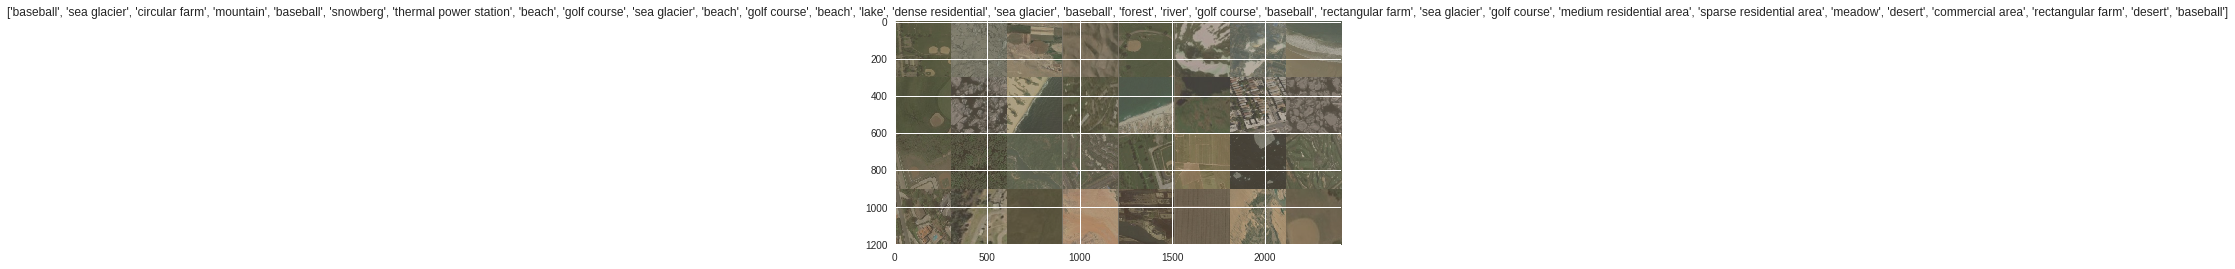

In [0]:
def imshow(inp, title=None):
    """Imshow for Tensor."""
    inp = inp.numpy().transpose((1, 2, 0))
    #mean = np.array([1, 1, 1])
    mean = np.array([0.485, 0.456, 0.406])
    std = np.array([0.229, 0.224, 0.225])
    inp = std * inp + mean
    inp = np.clip(inp, 0, 1)
    plt.imshow(inp)
    if title is not None:
        plt.title(title)
    plt.pause(0.001)  # pause a bit so that plots are updated


# Get a batch of training data
inputs, classes = next(iter(dataloaders['train']))
print(classes.data)

# Make a grid from batch
out = torchvision.utils.make_grid(inputs)

imshow((out), title=[class_names[x] for x in classes])

In [0]:
def visualize_model(model, num_images=6):
    was_training = model.training
    model.eval()
    images_so_far = 0
    fig = plt.figure()

    with torch.no_grad():
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            _, preds = torch.max(outputs, 1)
            print(preds.data)
            print(labels.data)

            for j in range(inputs.size()[0]):
                images_so_far += 1
                ax = plt.subplot(num_images//2, 2, images_so_far)
                ax.axis('off')
                ax.set_title('predicted: {}'.format(class_names[preds[j]]))
                imshow(inputs.cpu().data[j])

                if images_so_far ==num_images:
                    model.train(mode=was_training)
                    return
        model.train(mode=was_training)

In [0]:
def train1_model(model, criterion, optimizer,scheduler, num_epochs=1):
    since = time.time()

    best_model_wts = copy.deepcopy(model.state_dict())
    best_acc = 0.0

    for epoch in range(num_epochs):
        print('Epoch {}/{}'.format(epoch, num_epochs - 1))
        print('-' * 10)

        # Each epoch has a training and validation phase
        for phase in ['train','val']:
            if phase == 'train':
                scheduler.step()
                model.train()  # Set model to training mode
            else:
                model.eval()   # Set model to evaluate mode

            running_loss = 0.0
            running_corrects = 0

            # Iterate over data.
            for inputs, labels in dataloaders[phase]:
                inputs = inputs.to(device)
                labels = labels.to(device)

                # zero the parameter gradients
                optimizer.zero_grad()

                # forward
                # track history if only in train
                with torch.set_grad_enabled(phase == 'train'):
                    outputs = model(inputs)
                    _, preds = torch.max(outputs, 1)
                    #print('predicted',preds)
                    #print('actual',labels)
                    loss = criterion(outputs, labels)

                    # backward + optimize only if in training phase
                    if phase == 'train':
                        loss.backward()
                        optimizer.step()

                # statistics
                running_loss += loss.item() * inputs.size(0)
                running_corrects += torch.sum(preds == labels.data)

            epoch_loss = running_loss / dataset_sizes[phase]
            epoch_acc = running_corrects.double() / dataset_sizes[phase]

            print('{} Loss: {:.4f} Acc: {:.4f}'.format(
                phase, epoch_loss, epoch_acc))

            # deep copy the model
            if phase == 'val' and epoch_acc > best_acc:
                best_acc = epoch_acc
                best_model_wts = copy.deepcopy(model.state_dict())

        print()

    time_elapsed = time.time() - since
    print('Training complete in {:.0f}m {:.0f}s'.format(
        time_elapsed // 60, time_elapsed % 60))
    print('Best val Acc: {:4f}'.format(best_acc))

    # load best model weights
   
    torch.save(model.state_dict(best_model_wts),'habitats.pth')
    model.load_state_dict(best_model_wts)
   # model = TheModelClass(*args, **kwargs)
   # model.load_state_dict(torch.load("model.pth"))
    #model.eval()
    

    return model

In [0]:
model_conv2 = torchvision.models.inception_v3(pretrained=True)
model_conv2.aux_logits=False

In [0]:

    
print("[Inception: Freezing layers only till layer1 including]")
ct = []
#for name, child in model_conv2.named_children():
#    if "Conv2d_3b_1x1" in ct:
 #       for params in child.parameters():
  #          params.requires_grad = True
   # ct.append(name)
#for i, param in model_conv2.named_parameters():
  #  param.requires_grad = False


num_ftrs = model_conv2.fc.in_features
model_conv2.fc = nn.Linear(num_ftrs, 24)
model_conv2 = model_conv2.to(device)

criterion = nn.CrossEntropyLoss()

# Observe that all parameters are being optimized
optimizer_ft = optim.SGD(model_conv2.parameters(), lr=0.01, momentum=0.9)

# Decay LR by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)
#print(model_conv2)

[Inception: Freezing layers only till layer1 including]


In [0]:
model_conv2 = train1_model(model_conv2, criterion, optimizer_ft,exp_lr_scheduler, num_epochs=25)




Epoch 0/24
----------
6366
train Loss: 1.2218 Acc: 0.6437
6366
val Loss: 0.5714 Acc: 0.8200

Epoch 1/24
----------
6366
train Loss: 0.7653 Acc: 0.7744
6366
val Loss: 0.2663 Acc: 0.9172

Epoch 2/24
----------
6366
train Loss: 0.5979 Acc: 0.8176
6366
val Loss: 0.2330 Acc: 0.9288

Epoch 3/24
----------
6366
train Loss: 0.5147 Acc: 0.8434
6366
val Loss: 0.2547 Acc: 0.9164

Epoch 4/24
----------
6366
train Loss: 0.4582 Acc: 0.8596
6366
val Loss: 0.1846 Acc: 0.9391

Epoch 5/24
----------
6366
train Loss: 0.4438 Acc: 0.8627
6366
val Loss: 0.1400 Acc: 0.9571

Epoch 6/24
----------
6366
train Loss: 0.3681 Acc: 0.8872
6366
val Loss: 0.0977 Acc: 0.9711

Epoch 7/24
----------
6366
train Loss: 0.2875 Acc: 0.9108
6366
val Loss: 0.0388 Acc: 0.9887

Epoch 8/24
----------
6366
train Loss: 0.2408 Acc: 0.9263
6366
val Loss: 0.0333 Acc: 0.9914

Epoch 9/24
----------
6366
train Loss: 0.2415 Acc: 0.9232
6366
val Loss: 0.0287 Acc: 0.9936

Epoch 10/24
----------
6366
train Loss: 0.2131 Acc: 0.9328
6366
val Lo

6366
tensor([ 1,  6,  0,  7, 10, 17,  5,  0, 19, 22, 17,  6, 19,  7,  9,  4, 13, 23,
        22, 12,  4, 16, 17, 11,  0,  1, 14,  6,  0, 15, 15,  1],
       device='cuda:0')
tensor([ 1,  6,  0,  7, 10, 17,  5,  0, 19, 22, 17,  6, 19,  7,  9,  4, 13, 23,
        22, 12,  4, 16, 17, 11,  0,  1, 14,  6,  0, 15, 15,  1],
       device='cuda:0')


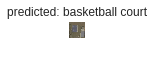

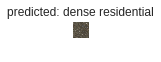

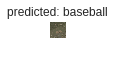

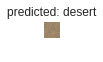

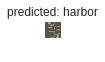

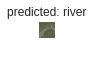

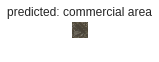

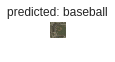

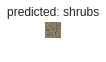

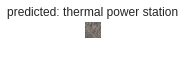

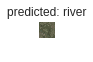

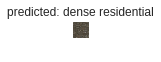

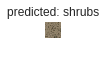

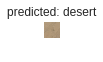

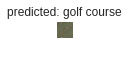

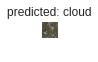

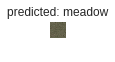

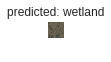

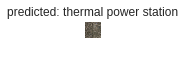

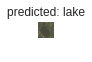

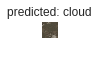

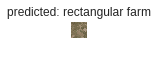

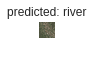

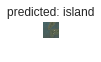

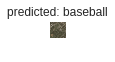

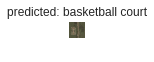

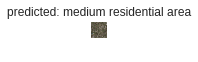

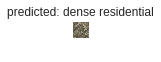

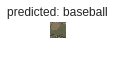

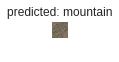

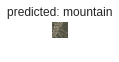

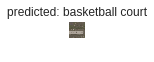

In [0]:
visualize_model(model_conv2)

In [0]:
data_transforms =  transforms.Compose([
        transforms.Resize(360),
        transforms.CenterCrop(299),
        transforms.ToTensor(),
     #  transforms.Normalize([0.485, 0.456, 0.406], [0.229, 0.224, 0.225])
    transforms.Normalize([0.5,0.5,0.5], [0.5,0.5,0.5])    
    ])


In [0]:
from pathlib import Path

image = Image.open(Path('Val Habitats/10.png'))

In [0]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

input=data_transforms(image)
input = input.view(1, 3, 299,299)
input=input.to(device)

In [0]:
output = model_conv2(input)
print(output)

tensor([[ 2.4209,  0.5573, -1.5372, -0.1309, -1.2698, -2.3690, -0.9828, -1.1732,
         -1.8637, 10.1480, -1.4059, -1.3212,  0.5790,  1.0575, -0.9906, -1.3848,
          0.8303,  3.2744, -1.1850, -1.8757, -1.8056, -0.1142, -2.6950,  2.5164]],
       device='cuda:0', grad_fn=<ThAddmmBackward>)


In [0]:
pred=torch.max(output,1)[1]
print(pred)
device='cpu'
pred=pred.to(device)
print(pred)


tensor([9], device='cuda:0')
tensor([9])


In [0]:
classes = ['baseball','basketball court','beach','circular farm','cloud','commercial area','dense residential','desert','forest','golf course','harbor','island','lake','meadow','medium residential area','mountain','rectangular farm','river','sea glacier','shrubs','snowberg','sparse residential area','thermal power station','wetland']

In [0]:
classes[pred]

'golf course'